# Problem 7

### About GLM and Linear Regression:
#### One characteristic of linear regression is that we can condider it in a a probablilistic way: $Y_i = b_0 + b_1x_i$ where i is index of each sample point and  given x_i, Y is a random variable with gaussian distribution (because of a noise with gaussian distribution). Now suppose that we have a sample that relationship between x and Y is not linear and maybe Y is not a continous random variable but a discrete one.
#### In general we model Y as a random variable having a distribution and when we apply a function(called link function) on the  parameters of that distribution, the result is linearly dependent to x and we write:
$$
L(\lambda_i) = b_0 + b_1x_i \\ 
y_i \sim Distribution(\lambda_i)
$$
#### Linear Regression is just a GLM where L(link function) is identity functin  and the Distribution is Gaussian. When L is natural logarithm and Distribution is Poisson we call the GLM a poisson regression.

In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Visualizing the data:

In [2]:
data = pd.read_csv("nyc_cyclist_counts.csv")
data

,Date,HIGH_T,LOW_T,PRECIP,BB_COUNT
0,1-Apr-17,46.0,37.0,0.00,606
1,2-Apr-17,62.1,41.0,0.00,2021
2,3-Apr-17,63.0,50.0,0.03,2470
3,4-Apr-17,51.1,46.0,1.18,723
4,5-Apr-17,63.0,46.0,0.00,2807
...,...,...,...,...,...
209,27-Oct-17,62.1,48.0,0.00,3150
210,28-Oct-17,68.0,55.9,0.00,2245
211,29-Oct-17,64.9,61.0,3.03,183
212,30-Oct-17,55.0,46.0,0.25,1428


#### We know that BB_COUNT has Piosson Distribution and samples are independent.

#### Separating the features and target

In [3]:
X = data.iloc[:, [1,2,3]].to_numpy()
y = data.iloc[:, [4]].to_numpy()

#### We use statsmodels library to build the poisson GLM. In this library the features and target are usually called exog and endog. We import the library as sm. with sm.add_constant(X) we add bias column to input features X. then we put the result in exog. We put y in endog. then with sn.GLM(...) we buld the model and give exog and endog to it. Also we specify the family(distribution of target) as the poisson distribution. The default link will be the log function.

In [4]:
exog, endog = sm.add_constant(X), y
model = sm.GLM(endog, exog, family=sm.families.Poisson(link=sm.families.links.log()))

#### Now that we have built the modle we use model.fit() to fit the model to data. It will return the fitted_model object.

In [5]:
fitted_model = model.fit()

#### We call fitted_model.predict(exog) to predict the target for data. 

In [6]:
y_pred = fitted_model.predict(exog)

## we put the predictoin result in the preds column of the orginal data
data['preds'] = y_pred
data

,Date,HIGH_T,LOW_T,PRECIP,BB_COUNT,preds
0,1-Apr-17,46.0,37.0,0.00,606,2037.066983
1,2-Apr-17,62.1,41.0,0.00,2021,2810.128920
2,3-Apr-17,63.0,50.0,0.03,2470,2493.640949
3,4-Apr-17,51.1,46.0,1.18,723,808.721689
4,5-Apr-17,63.0,46.0,0.00,2807,2689.087230
...,...,...,...,...,...,...
209,27-Oct-17,62.1,48.0,0.00,3150,2565.999474
210,28-Oct-17,68.0,55.9,0.00,2245,2655.702720
211,29-Oct-17,64.9,61.0,3.03,183,214.918621
212,30-Oct-17,55.0,46.0,0.25,1428,1835.822906


#### Here we show the summary of the GLM with fitted_model.summary(). As you can see the model family is ***Poisson*** and number of observations is 214 and Link Function as we wanted is ***log*** function.

In [7]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  214
Model:                            GLM   Df Residuals:                      210
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16089.
Date:                Mon, 16 Nov 2020   Deviance:                       30113.
Time:                        23:11:52   Pearson chi2:                 2.94e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0321      0.010    675.941      0.000       7.012       7.052
x1             0.0232      0.000     78.183      0.000       0.023       0.024
x2            -0.0130      0.000    -40.672      0.000      -0.014      -0.012
x3            -0.7842      0.007   -115.225      0.000      -0.798      -0.771
==============================================================================
"""

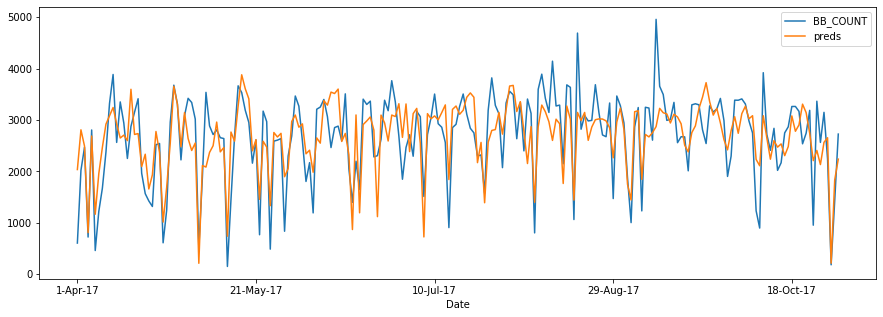

In [8]:
data.plot(x = 'Date', y = ['BB_COUNT', 'preds'], figsize=(15,5));

#### As we can see from above plot the model has performed well in predicting the BB_COUNT column.

In [9]:
######################################### PROBLEM SEPARATION #######################################################
##############################################################################################################
##############################################################################################################

# Problem 8

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [11]:
data = pd.read_csv("Iris.csv")

#### With dataframe.sapmle we shuffle the input data and we give a particular random_state(as a seed for random function) to this function to make the results comparable.

In [12]:
seed=42

In [13]:
data = data.sample(frac=1, random_state=seed)

In [14]:
feature_columns = data.columns[:4]
feature_columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'], dtype='object')

#### In normalize function we get a dataframe and subtract each columns mean from it and divide it to it's std so that it have mean=0 and std=1.

In [15]:
def normalize(df):
    new_df = df.copy()
    for col in feature_columns:
        new_df[col] -= df[col].mean()
        new_df[col] /= df[col].std()
    return new_df

#### Here we normalize the data so that will test the classifier for both data and normalized_data:

In [16]:
data_normalized = normalize(data)

#### We obtain the unique classes in target column with np.unique()

In [17]:
categories = np.unique(data["Class"])

# 8.a
#### Here we want to plot the distribution of the categories in each pair of features. First off we group the data by target column. Then In plot_columns we specify index of each pair of columns. and then we plot the specified features of the groups.

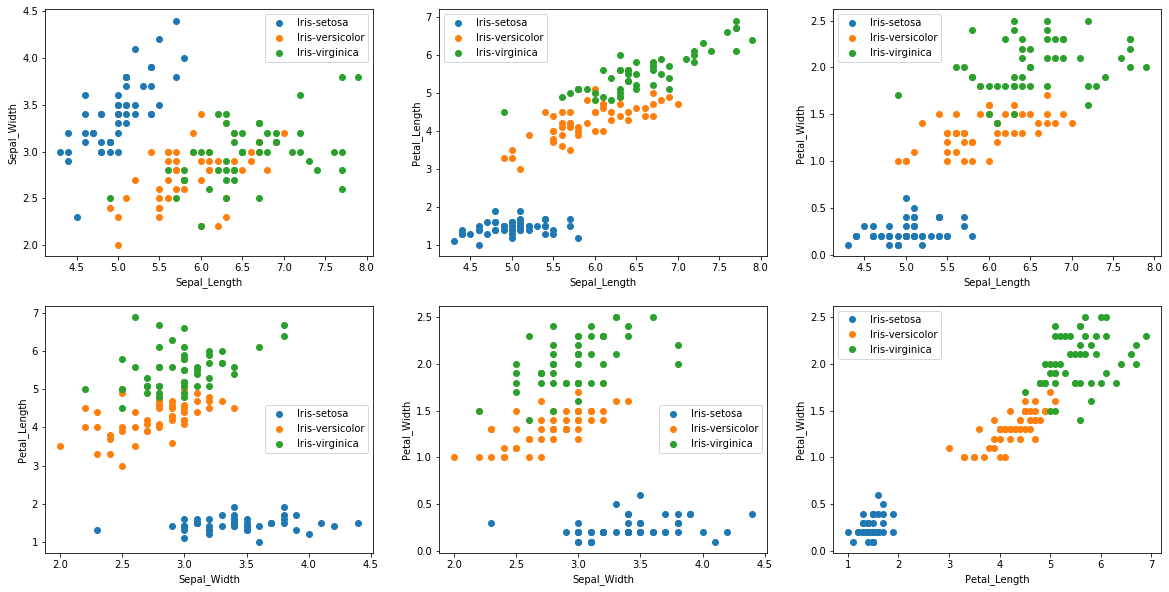

In [18]:
fig, axes = plt.subplots(2,3, figsize=(20,10))
axes = axes.flat
groups = data.groupby("Class")
columns = data.columns
plot_columns = [(0,1), (0,2), (0,3), (1,2), (1,3), (2,3)]

for i,p in enumerate(plot_columns):
    for name, group in groups:
        axes[i].plot(group[columns[p[0]]], group[columns[p[1]]], marker="o", linestyle="", label=name)
        axes[i].set_xlabel(columns[p[0]])
        axes[i].set_ylabel(columns[p[1]])
        axes[i].legend()

#### We can conclude from above plots that based on features Petal_Lenth and Petal_Width the three categories are more distinctivly and linearly separable so a lineaer classifier can have more accuracy based on these two features.

# 8.b
#### In train_test_splitter function we select  80% of data for training and 20% of data for testing.

In [19]:
def train_test_splitter(data_to_split):
    split_point =  int(0.8 * len(data_to_split))
    X_train = data_to_split.iloc[:split_point, [0,1,2,3]]
    y_train =  data_to_split.iloc[:split_point, [-1]]
    X_test = data_to_split.iloc[split_point:, [0,1,2,3]]
    y_test = data_to_split.iloc[split_point:, [-1]]
    return(X_train, X_test, y_train, y_test)

X_train, X_test, y_train, y_test = train_test_splitter(data)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_splitter(data_normalized)

#### We assign a unique integer for each class name(later it will help in more simple coding)

In [20]:
class_idx = {}
for i,c in enumerate(categories):
    class_idx[c] = i
class_idx

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

#### Here we build the classifier function. It uses Euclidian distance and for this reason it iterates over test samples and for each sample it subtracts the sample from all training samples and finds the square of the result. Then finds the minimum of them and then uses the closest point class as the prediction for current test sample. Meanwhile we compare the prediction result for each test point, for the real class of that point and if it is true we increment the 'corrects' variable which is 0 at first. 
#### Also we have an n by n confusion matrix which is initially zeros.  For each predicted class i and real class j we increment the matrix_ij to build the confusion matrix.
#### This classifier returns the accuracy and confusion matrix.

In [21]:
def nn_classify(X_train, X_test, y_train, y_test):
    
    conf_mtx = np.zeros((3,3))
    corrects = 0
    
    for i, _ in X_test.iterrows():
        diffs = X_train.loc[:, feature_columns] - X_test.loc[i, feature_columns].squeeze(0)
        nearest_index = diffs.pow(2).sum(axis=1).idxmin()
        
        prediction = y_train.loc[nearest_index, 'Class']
        real_class = y_test.loc[i, 'Class']
        
        conf_mtx[class_idx[prediction]][class_idx[real_class]] += 1
        
        if prediction == y_test.loc[i, 'Class']:
            corrects += 1
        
    accuracy = corrects/len(X_test) * 100
    return accuracy, conf_mtx

### Accuracy and Confusoin Matrix

### 8.b: Non-Normalized Data

In [22]:
accuracy, conf_mtx = nn_classify(X_train, X_test, y_train, y_test)

In [23]:
print('accuracy of NN classifier for non-normalized data is:', round(accuracy), '%')

accuracy of NN classifier for non-normalized data is: 97 %


In [24]:
print('confusion matrix of NN classifier for non-normalized data is:')
print(conf_mtx)

confusion matrix of NN classifier for non-normalized data is:
[[ 7.  0.  0.]
 [ 0. 11.  1.]
 [ 0.  0. 11.]]


### 8.b: Normalized Data

In [25]:
accuracy, conf_mtx = nn_classify(X_train_normal, X_test_normal, y_train_normal, y_test_normal)

In [26]:
print('accuracy of NN classifier for normalized data is:', round(accuracy), '%')

accuracy of NN classifier for normalized data is: 97 %


#### I tried different seeds for shuffling and for different seeds the difference between seeds are different. In current seed they have no differnece.

# 8.c

In [27]:
print('confusion matrix of NN classifier for normalized data is:')
print(conf_mtx)

confusion matrix of NN classifier for normalized data is:
[[ 7.  0.  0.]
 [ 0. 11.  1.]
 [ 0.  0. 11.]]


#### Now we want to calculate the presision, recall and f1-score for each target class. First we initiaze 3 arrays one for each. 

In [28]:
precisions = []
recalls = []
f1 = []

#### The we iterate over categories and calculate each metric for each category will following formula and append the result to the correspoing array:

$$
presisoin = \frac{TP}{TP + FP} \\
recall = \frac{TP}{TP + FN} \\
F1score = 2 \times \frac{recall \times presisoin}{recall + presicion}
$$

In [29]:
for i in range(len(categories)):
    precision = conf_mtx[i][i] / conf_mtx.sum(axis=1)[i]
    precisions.append(precision)
    
    recall = conf_mtx[i][i] / conf_mtx.sum(axis=0)[i]
    recalls.append(recall)
    f1.append(2 * (precision * recall) / (precision + recall))

In [30]:
for i in range(len(categories)):
    print('precision for class {} = {}'.format(categories[i], round(precisions[i], 3)))
    print('recall for class {} = {}'.format(categories[i], round(recalls[i])))
    print('F1-score for class {} = {}\n'.format(categories[i], round(f1[i])))

precision for class Iris-setosa = 1.0
recall for class Iris-setosa = 1.0
F1-score for class Iris-setosa = 1.0

precision for class Iris-versicolor = 0.917
recall for class Iris-versicolor = 1.0
F1-score for class Iris-versicolor = 1.0

precision for class Iris-virginica = 1.0
recall for class Iris-virginica = 1.0
F1-score for class Iris-virginica = 1.0



# 8.d Using Sklearn

In [31]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

In [32]:
data = pd.read_csv("Iris.csv")
data_normalized = normalize(data)

In [33]:
X = data[feature_columns]
y = data['Class']

X_normalized = data_normalized[feature_columns]
y_normalized = data_normalized['Class']

#### Here we binarize each sample's class(also called one-hot, one-vs-rest) because we want to plot the roc for each class individually and sklearn roc plots only work for binary classifiction.

In [34]:
y_binary = label_binarize(y, classes=y.unique())
y_normalized_binary = label_binarize(y_normalized, classes=y_normalized.unique())

#### for example for first sample the target will be shown like [1,0,0] it means that it's target class is first class:

In [35]:
y_binary[0]

array([1, 0, 0])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=seed)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_normalized, y_normalized_binary,
                                                                                test_size=0.2, random_state=seed)

#### Here we use KNeighborsClassifier with k = 1 to build a nearest neighbour classifier

In [37]:
knn = KNeighborsClassifier(n_neighbors=1)

## Non-Normalized Data

#### Now we fit the classifer to train data.

In [38]:
knn.fit(X_train, y_train);

#### We find the accurancy of the model with score function. We can see that the classifier has performed quite well on thNon-Normalized data:

In [39]:
print('score on non-normalized data =', knn.score(X_test, y_test) * 100, '%')

score on non-normalized data = 100.0 %


## Normalized Data

In [40]:
knn.fit(X_train_normal, y_train_normal)
y_pred = knn.predict(X_test_normal)
print('score on normalized data =', knn.score(X_test_normal, y_test_normal) * 100, '%')

score on normalized data = 96.66666666666667 %


#### Here we plot the roc curves for each class. First we iterate over classes and find the fp-rate and tp rate for each and save them in fpr, tpr arrys. Also we save area under curve for each roc curve in roc_auc array. Then we iterate over these arrays and plot them and we show the area as a legend at the buttom of each plot.

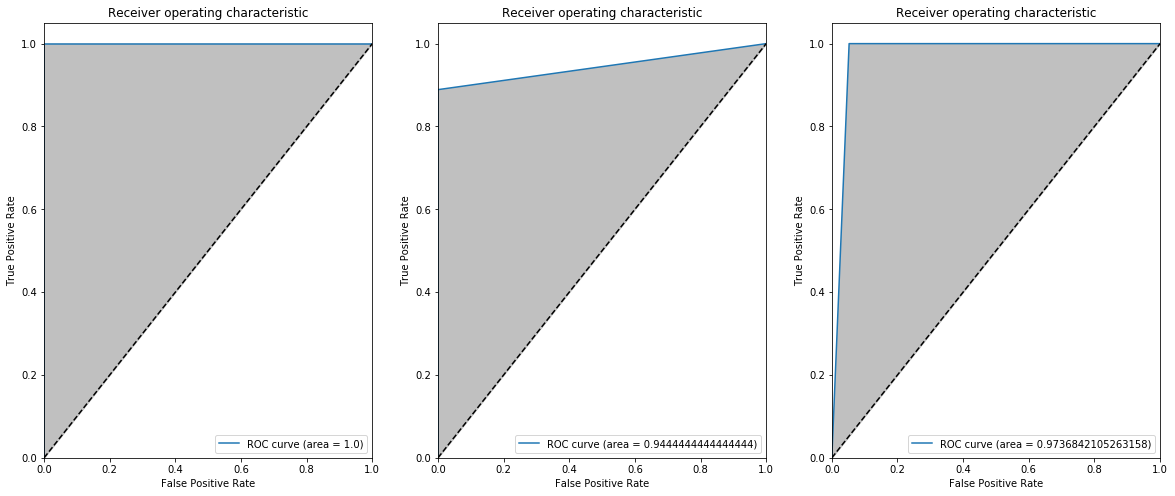

In [41]:
n_classes = y_test.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for each class
fig, axes = plt.subplots(1,3, figsize=(20,8))
axes = axes.flat
for i in range(n_classes):
    axes[i].plot(fpr[i], tpr[i], label='ROC curve (area = {})'.format(roc_auc[i]))
    axes[i].plot([0, 1], [0, 1], 'k--')
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])
    axes[i].fill_between(fpr[i], fpr[i], tpr[i], 1, color='silver')
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title('Receiver operating characteristic')
    axes[i].legend(loc="lower right")

In [42]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

   micro avg       0.97      0.97      0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30
 samples avg       0.97      0.97      0.97        30



#### Here we plot the confusoin matrix. Above we had binarized the target column. But sklearn plot_confusion_matrix does not work with binarized column. So again we split the train-test data with the main(non-binary) target column and plot the confusion matrix.

Confusion matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


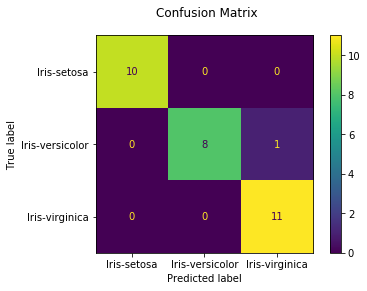

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_normalized, y_normalized,
                                                                                test_size=0.2, random_state=seed)
knn.fit(X_train_normal, y_train_normal)
disp = plot_confusion_matrix(knn, X_test_normal, y_test_normal, values_format = '.5g')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

In [44]:
######################################### PROBLEM SEPARATION #######################################################
##############################################################################################################
##############################################################################################################

# Problem 9

## 9.a
#### In naive bayes classifier we assume that features of the data are i.i.d and so we can write:
$$
P(x_1,x_2,\dots, x_n\,\,|w) = P(x_1|w)\times P(x_2|w)\times\dots\times P(x_n|w)
$$
Naive bayes helps us is named naive because it is not usually the case that features are i.i.d but for simplicity we assume that. Naive bayes is not optimal.
In optimal bayes we must consider an specific distribution for $P(x_1,x_2,\dots, x_n\,\,|w)$

## 9.b

In [45]:
import pandas as pd
import numpy as np

### Naive Bayes:
#### In fit function we find the priors by fequnecy of occurence. Then we group the training data by there target class and the for each group we have find mean and std and we have saved them in mean and vars array.

#### In predict function we iterate over test samples and for each sample we have iterated on each class and  found the log-likelihood by gaussian normal function and we have found the product of loglikelihood to the prior of that class and then we have found the argmax class and returned it as predction.

In [46]:
class NBC:
    def fit(self, X, y):
        X_matrix = X.to_numpy()
        num_samples, num_features = X.shape
        self.classes = np.unique(y)
        self.priors = y['Class'].value_counts() / num_samples
        self.means = X.groupby(y['Class']).mean().to_numpy()
        self.vars = X.groupby(y['Class']).std().to_numpy()
    
    
    def predict(self, X_test):
        return [self._predict(x) for x in X_test]
        
    def _predict(self, x):
        posteriors = []
        for c in self.classes:
            c = int(c)
            s_c = self.vars[c]
            mean_c = self.means[c]
            
            non_zero_vars = s_c != 0
            s_c = s_c[non_zero_vars]
            mean_c = mean_c[non_zero_vars]
            x_c = x[non_zero_vars]
            
            pi = np.pi
            likelihoods = np.exp(-(x_c-mean_c)**2 / (2 * s_c)) / (np.sqrt(2*pi*s_c + 1e-5))
            posterior = np.sum(np.log(likelihoods)) + np.log(self.priors[c])
            posteriors.append(posterior)
            
        return self.classes[np.argmax(posteriors)]

nbc = NBC()

## 9.b Performance of Naive Bayes on MNIST Data Set

In [47]:
X_train = pd.read_csv('TinyMNIST/trainData.csv', header=None)
X_test = pd.read_csv('TinyMNIST/testData.csv', header=None)
y_train = pd.read_csv('TinyMNIST/trainLabels.csv', header=None)
y_test = pd.read_csv('TinyMNIST/testLabels.csv', header=None)

In [48]:
y_train = y_train.rename({0:'Class'}, axis='columns')
y_test = y_test.rename({0:'Class'}, axis='columns')

In [49]:
nbc.fit(X_train, y_train)

#### We can see that the performance of naive bayes classifier on test samples is 49.3% and it can be improved by using normalizatoin and whitenning.

In [50]:
predicts = nbc.predict(X_test.to_numpy())
num_classes = len(np.unique(y_test))
accuracy = np.sum(predicts == y_test.to_numpy().reshape(1,-1))
ac = accuracy / len(predicts)
print('accuracy of our naive bayes =', round(ac*100, 1),'%');

accuracy of our naive bayes = 49.4 %


/home/amin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log


### Now we iterate over predictions and obtain confusion matrix for our naive bayes classifier

In [51]:
conf_mtx_mnist = np.zeros((num_classes, num_classes))
for i in range(len(predicts)):
    conf_mtx_mnist[int(predicts[i])][int(y_test.to_numpy()[i])] += 1

In [52]:
precisions = []
recalls = []
f1 = []
for i in range(num_classes):
    precision = conf_mtx_mnist[i][i] / conf_mtx_mnist.sum(axis=1)[i]
    precisions.append(precision)
    
    recall = conf_mtx_mnist[i][i] / conf_mtx_mnist.sum(axis=0)[i]
    recalls.append(recall)
    f1.append(2 * (precision * recall) / (precision + recall))
for i in range(num_classes):
    print('F1-score for class {} = {}\n'.format(i, f1[i]))

F1-score for class 0 = 0.6686217008797654

F1-score for class 1 = 0.5279850746268656

F1-score for class 2 = 0.7027027027027025

F1-score for class 3 = 0.4747774480712167

F1-score for class 4 = 0.4333635539437897

F1-score for class 5 = 0.4126074498567336

F1-score for class 6 = 0.7132530120481927

F1-score for class 7 = 0.6252771618625278

F1-score for class 8 = nan

F1-score for class 9 = 0.016260162601626018



/home/amin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


## 9.c Performance of Naive Bayes Noisy Moon Data Set

In [53]:
data_moon = pd.read_csv('./Noisy Moons.csv', header=None)

In [54]:
feature_columns = [0,1]
def normalize(df):
    new_df = df.copy()
    for col in feature_columns:
        new_df[col] -= df[col].mean()
        new_df[col] /= df[col].std()
    return new_df
data_moon = normalize(data_moon)

In [55]:
from sklearn.model_selection import train_test_split
X_moon = data_moon[[0,1]]
y_moon = data_moon[[2]]
seed = 49
X_train_moon, X_test_moon, y_train_moon, y_test_moon = train_test_split(X_moon, y_moon, test_size=0.2, random_state=seed)

#### We can see that our implentation of naive bayes classifier has 82% performance noisy moon dataset.

In [56]:
y_train_moon = y_train_moon.rename({2:'Class'}, axis='columns')
y_test_moon = y_test_moon.rename({2:'Class'}, axis='columns')

In [57]:
nbc = NBC()
nbc.fit(X_train_moon, y_train_moon)
predicts = nbc.predict(X_test_moon.to_numpy())
accuracy = np.sum(predicts == y_test_moon.to_numpy().reshape(1,-1))
ac = accuracy / len(predicts)
print('accuracy of our naive bayes =', round(ac*100, 1),'%')

accuracy of our naive bayes = 82.0 %


#### confusion matrix for noisy moon

In [58]:
num_classes = len(np.unique(y_test_moon))
conf_mtx = np.zeros((num_classes, num_classes))
for i in range(len(predicts)):
    conf_mtx[int(predicts[i])][int(y_test_moon.to_numpy()[i])] += 1

In [59]:
precisions = []
recalls = []
f1 = []
for i in range(num_classes):
    precision = conf_mtx[i][i] / conf_mtx.sum(axis=1)[i]
    precisions.append(precision)
    
    recall = conf_mtx[i][i] / conf_mtx.sum(axis=0)[i]
    recalls.append(recall)
    f1.append(2 * (precision * recall) / (precision + recall))
for i in range(num_classes):
    print('F1-score for class {} = {}\n'.format(i, f1[i]))

F1-score for class 0 = 0.830188679245283

F1-score for class 1 = 0.8085106382978724



# 9.d Using Sklearn

In [60]:
X_train = pd.read_csv('TinyMNIST/trainData.csv', header=None)
X_test = pd.read_csv('TinyMNIST/testData.csv', header=None)
y_train = pd.read_csv('TinyMNIST/trainLabels.csv', header=None)
y_test = pd.read_csv('TinyMNIST/testLabels.csv', header=None)

#### we see that sklearn has 50% performance

In [61]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train[0])
ac = gnb.score(X_test, y_test[0])
print('accuracy of sklearn naive bayes =', round(ac*100, 1),'%')

accuracy of sklearn naive bayes = 50.7 %


In [62]:
from sklearn.metrics import classification_report
y_pred = gnb.predict(X_test)
print(classification_report(y_test[0], y_pred));

              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79       219
         1.0       0.53      0.97      0.69       287
         2.0       0.80      0.26      0.40       276
         3.0       0.75      0.24      0.37       254
         4.0       0.77      0.28      0.41       275
         5.0       0.83      0.07      0.13       221
         6.0       0.62      0.80      0.70       225
         7.0       0.86      0.23      0.37       257
         8.0       0.25      0.58      0.35       242
         9.0       0.39      0.84      0.53       244

    accuracy                           0.51      2500
   macro avg       0.66      0.51      0.47      2500
weighted avg       0.66      0.51      0.47      2500



#### We can see that sklearn naive bayes classifier also has 82% performance noisy moon dataset. 

In [63]:
gnb = GaussianNB()
gnb.fit(X_train_moon, y_train_moon['Class'])
ac = gnb.score(X_test_moon, y_test_moon)
print('accuracy of sklearn naive bayes =', round(ac*100, 1),'%')

accuracy of sklearn naive bayes = 82.0 %


In [64]:
from sklearn.metrics import classification_report
y_pred_moon = gnb.predict(X_test_moon)
print(classification_report(y_test_moon, y_pred_moon));

              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83        50
         1.0       0.86      0.76      0.81        50

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



### Conclusion of Problem 9:
#### our implementation of Naive Bayes classifier had same result as sklearn classifier:
#### about 50 % for mnist dataset and about 82% for noisy moon dataset
#### Also F1 are almost the same

In [65]:
######################################### PROBLEM SEPARATION #######################################################
##############################################################################################################
##############################################################################################################

# Problem 10

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### We define the sigmoid function as the activation funtion of our model

In [67]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#### I have implemented the Logistic Regression classifier as a class. In this class:
- init_weights : returns the initial weights vector that has the same length as each sample.
- add_bias : adds bias(1's) to each sample so that we do not need to add bias(b) explicitly in our later calculations.
- caculate_loss calculates the sum of squared errors loss
- fit : It is the main function. We will find three lines for separating classes. For each class we binarize the target column based on that class(i.e. in a one vs all fassion) using numpy.where(). We have an array of losses and an array of weights that contain losses and weigths found in optaining each line. So we have a for loop that iterates 3 times(we have 3 classes) and the we have a for loop for gradient descent. We save weights and costs of each of the 3 loops in the corresponding arrays.

### Loss function we have used is sum of squared errors loss

In [68]:
class LR:
    def __init__(self):
        self.costs = []
    
    def init_weights(self, num_features):
        return np.zeros(num_features)
                            
    
    def add_bias(self, X):
        return np.insert(X, 0, 1, axis=1)
    
    def caculate_loss(self, a, y):
        m = len(y)
        cost = (1 / m) * (np.sum(-y.T.dot(np.log(a)) - (1 - y).T.dot(np.log(1 - a))))
        return cost
        
    
    def fit(self, X, y, alpha=0.01, num_iterations=100):
        self.classes = np.unique(y)
        self.params = []
        X = self.add_bias(X)
        
        m = X.shape[0]
        
        for c in self.classes:
            each_costs = []
            y_onevsall = np.where(y == c, 1, 0)
            w = self.init_weights(X.shape[1])
                            
            for i in range(num_iterations):
                a = sigmoid(X.dot(w))
                dw = (1/m) * X.T.dot(a - y_onevsall)
                w -= alpha * dw
                each_costs.append(self.caculate_loss(a, y_onevsall))
            self.costs.append(each_costs)
            self.params.append((c, w))
            

    def predict(self, X):
        X = self.add_bias(X)                   
        y_preds = []
        for x in X:
            one_vs_rest_preds = []
            for c, w in self.params:
                one_vs_rest_preds.append((sigmoid(x.dot(w)), c))
            y_preds.append(max(one_vs_rest_preds)[1])
        return y_preds
    
    def get_params(self):
        return [w for c,w in self.params]
    
    def get_costs(self):
        return self.costs

In [69]:
data = pd.read_csv('random_dataset.csv', header=None)

In [70]:
X = data[[0,1]]
y = data[2]

#### Here we normalize the data:

In [71]:
def normalize(df):
    new_df = df.copy()
    for col in df.columns:
        new_df[col] -= df[col].mean()
        new_df[col] /= df[col].std()
    return new_df
X = normalize(X)

In [72]:
lr = LR()
lr.fit(X.to_numpy(), y.to_numpy(), 0.01, 1000)

#### We can see that the classes are classified completely:

In [73]:
(lr.predict(X.to_numpy()) == y).sum() * 100 / len(y)

100.0

#### We get the weiths of the 3 lines to plot them:

In [74]:
params = lr.get_params()

#### First we scatter plot the data and the we plot the lines:
$$
w_2x_2 + w_1x_1 + w_0 = 0
$$

(-2, 2)

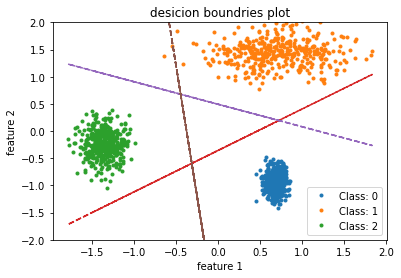

In [75]:
fig, ax = plt.subplots()
groups = X.groupby(y)
columns = X.columns

for name, group in groups:
    ax.plot(group[0], group[1], marker=".", linestyle="", label='Class: ' + str(int(name)))

for b, w1, w2 in params:
    yx = -w1/w2 * X.to_numpy()[:,0] - b/w2
    ax.plot(X.to_numpy()[:,0], yx, linestyle="--")


ax.legend()
ax.set_title('desicion boundries plot')
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_ylim(-2,2)

#### We get the cost to plot them:

In [76]:
costs = lr.get_costs()

Text(0, 0.5, 'cost')

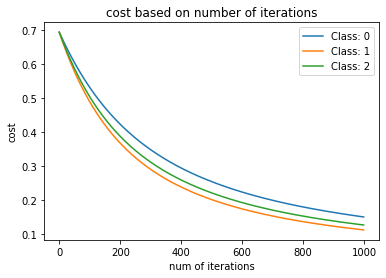

In [77]:
fig, ax = plt.subplots()
for i in range(len(np.unique(y))):
    x = np.arange(len(costs[0]))
    ax.plot(x, costs[i], label= 'Class: ' + str(i))
plt.legend()
ax.set_title('cost based on number of iterations')
ax.set_xlabel('num of iterations')
ax.set_ylabel('cost')

#### We see that the costs are decreasing smoothely(we normalized the data).

In [78]:
######################################### PROBLEM SEPARATION #######################################################
##############################################################################################################
##############################################################################################################

# Problem 11

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#### Normalize is just like the prevoius problem. 
#### Transform function takes the dataframe with two features and a degree and adds needed powers of the two columns upto degree-1 to that dataframe. For example for degree=7 it the dataframe columns will be:
$$
x_0: first\,column\\
x_1: second\,column\\
next\,columns: x_1^2,\,x_1^3,\,x_1^4,\,x_1^5,\,x_1^6,\,x_0^1x_1^1,\,x_0^1x_1^2, \dots, x_0^6
$$

In [81]:
def normalize(df):
    new_df = df.copy()
    for col in df.columns:
        new_df[col] -= df[col].mean()
        new_df[col] /= df[col].std()
    return new_df

def transform(X, deg):
    for i in range(0, deg):
        for j in range(0, deg):
            if(i+j <= 6 and i+j >= 2):
                X[str(i) + ',' + str(j)] = X[0].pow(i) * X[1].pow(j)
    return X

 The logistic regression classifier class is like problem 10 but we have added the regularization to the derivative(gradient):
$$
\frac{\lambda}{m} \sum_{i} w_i
$$

In [82]:
class LR:
    def __init__(self):
        self.costs = []
    
    def init_weights(self, num_features):
        return np.zeros(num_features)
                            
    
    def add_bias(self, X):
        return np.insert(X, 0, 1, axis=1)
    
    def fit(self, X, y, alpha=0.01, num_iterations=100, lamda=0.1):
        self.classes = np.unique(y)
        self.params = []
        X = self.add_bias(X)
        
        m = X.shape[0]
        
        for c in self.classes:
            each_costs = []
            y_onevsall = np.where(y == c, 1, 0)
            w = self.init_weights(X.shape[1])
                            
            for i in range(num_iterations):
                a = sigmoid(X.dot(w))
                dw = (1/m) * X.T.dot(a - y_onevsall) + w.sum() * lamda/m
                w -= alpha * dw
            self.params.append((c, w))
            

    def predict(self, X):
        X = self.add_bias(X)
        y_preds = []
        for x in X:
            one_vs_rest_preds = []
            for c, w in self.params:
                one_vs_rest_preds.append((sigmoid(x.dot(w)), c))
            y_preds.append(max(one_vs_rest_preds)[1])
        return y_preds
    
    def get_params(self):
        return [w for c,w in self.params]

#### Here we first normalize and transform the data to multi-feature data and the fit the model to data:

In [83]:
data = pd.read_csv('quality_test.csv', header=None)
X = data[[0,1]]
y = data[2]     

X = normalize(X)
X = transform(X, 7)

lr = LR()
lr.fit(X.to_numpy(), y.to_numpy(), alpha=0.01, num_iterations=1000, lamda=0.1)

#### Here we find the performance of the classification. It is good but not perfect.

In [84]:
y_preds = lr.predict(X.to_numpy())
print(round((y_preds == y).sum() * 100 / len(y), 1), '%')

83.1 %


### Plotting the result:

 First off we scatter plot each group(category). Then we make a numpy array from the features dataframe. Then we make a 2D meshgrid of points in the range of first and second features to plot the desicion boundary. Then we concatinate the xx and yy points(x and y of meshgrid respectively) to obtain two features for each sample. Now we transform these two columns to desired degree(6) and then we add bias 1's to it(like problem 10). Now we have the complete polynomial x features to plot desicion boundary. We take the dot product of the weights and x to find the predictions(Z). Now it remains to reshape to the same shape as meshgrid. The we plot the contour plot of the meshgrid with the predictions(Z). We specify levels=[0] to plot just one contour plain level.

Text(0, 0.5, 'feature 2')

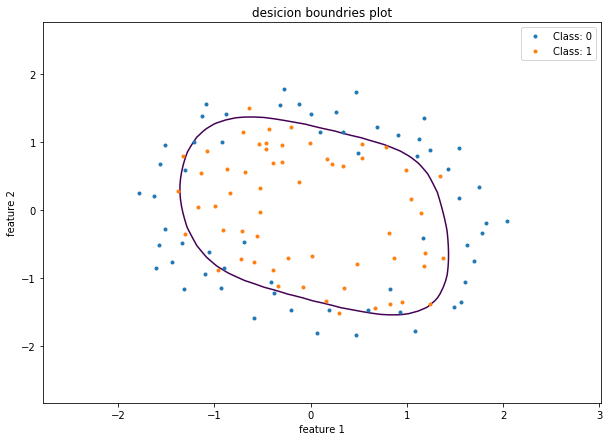

In [85]:
fig, ax = plt.subplots(figsize=(10,7))

groups = X.groupby(y)
for name, group in groups:
    ax.plot(group[0], group[1], marker=".", linestyle="", label='Class: ' + str(int(name)))
        
        
columns = X.columns
X_array = X.to_numpy()

w = lr.get_params()[0]

plot_step = 0.1
x_min, x_max = X_array[:, 0].min() - 1, X_array[:, 0].max() + 1
y_min, y_max = X_array[:, 1].min() - 1, X_array[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

x = transform(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()]), 7).to_numpy()
x = np.insert(x, 0, 1, axis=1)
Z = x.dot(w)
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, levels=[0])
ax.legend()
ax.set_title('desicion boundries plot')
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')

#### We see that the desicion boundary has separated the blue and orange points well.